# Résumé

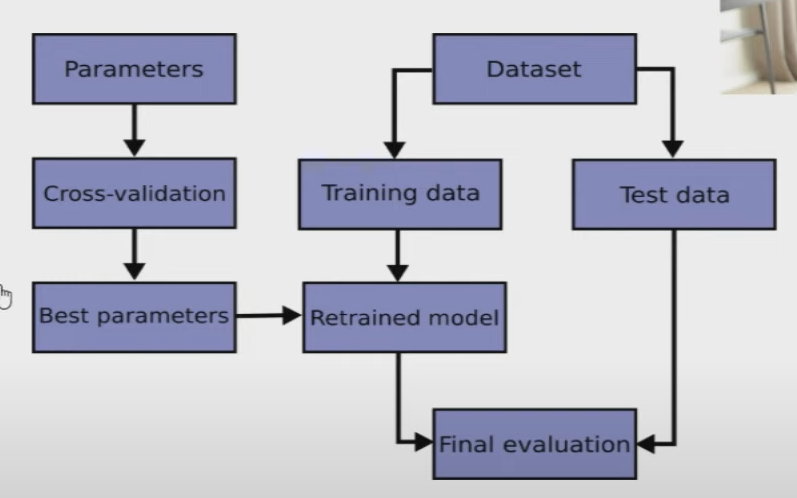
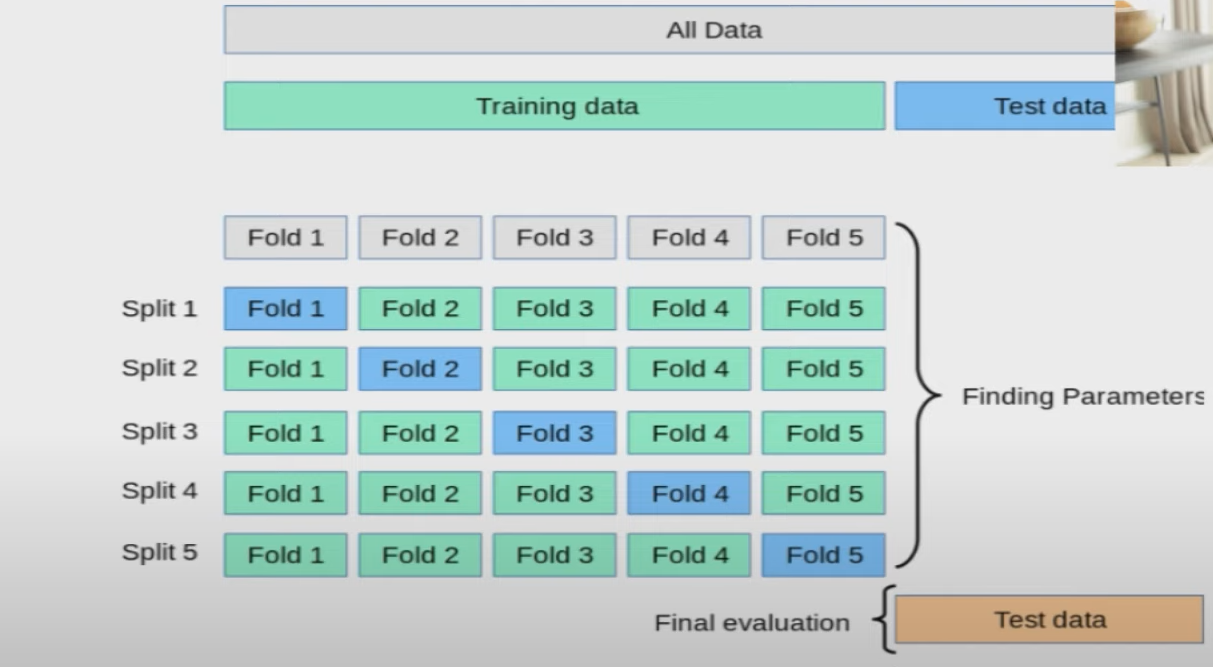

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
#Importation de la fonction train_test_split
from sklearn.model_selection import train_test_split
#Importe le modèle KNeighbors
from sklearn.neighbors import KNeighborsClassifier
#Importe le cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
#Importe gridSearchCV
from sklearn.model_selection import GridSearchCV
#importe confusion_matrix
from sklearn.metrics import confusion_matrix
#Importe learning curve
from sklearn.model_selection import learning_curve

Ne jamais évaluer la performance d'un modèle sur les données d'entrainement
=> Séparer les données du dataset

Pour les séparer utiliser la fonction: train_test_split


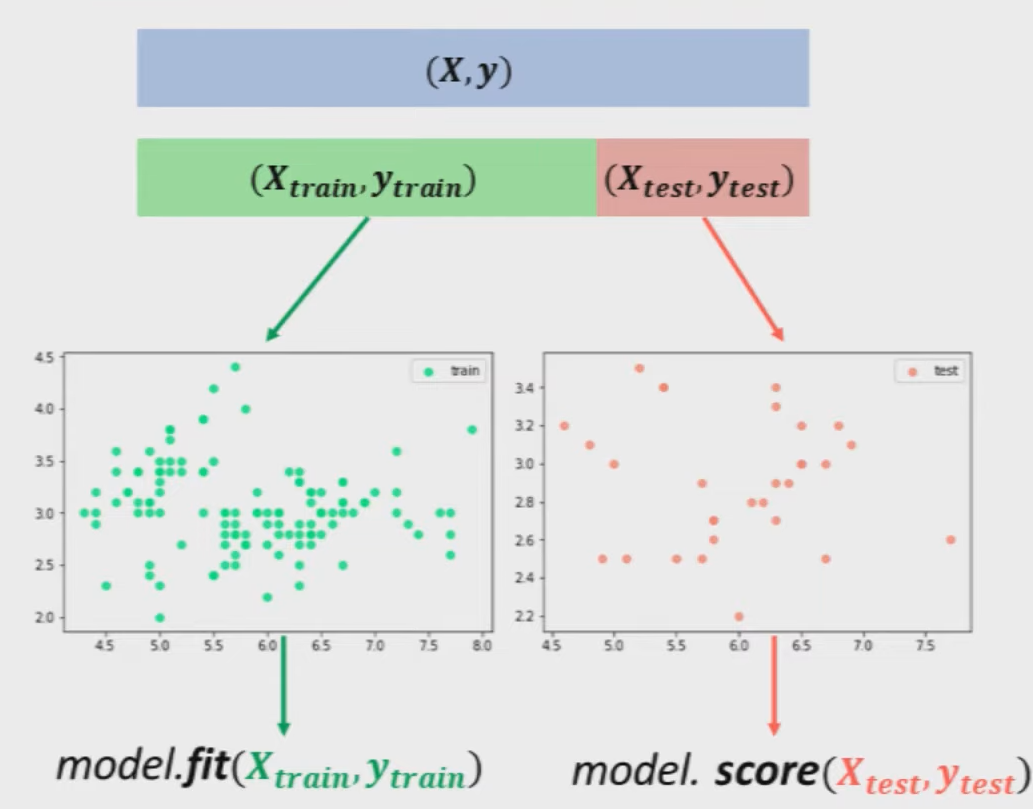

Module: model selection

(150, 4)


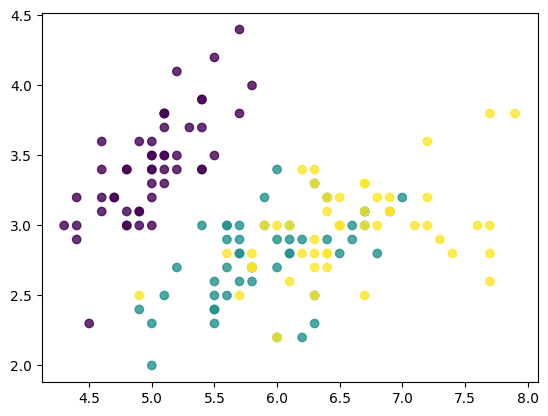

In [46]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
plt.scatter (X[:, 0], X[:, 1], c=y, alpha=0.8)

In [47]:
#function(X, y, test_size=taille_pourcentage_test, random_state=fixe_aleatoire)
#On divise les données en un ensemble d'entraînement(80%) et un ensemble de test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Text(0.5, 1.0, 'Test set')

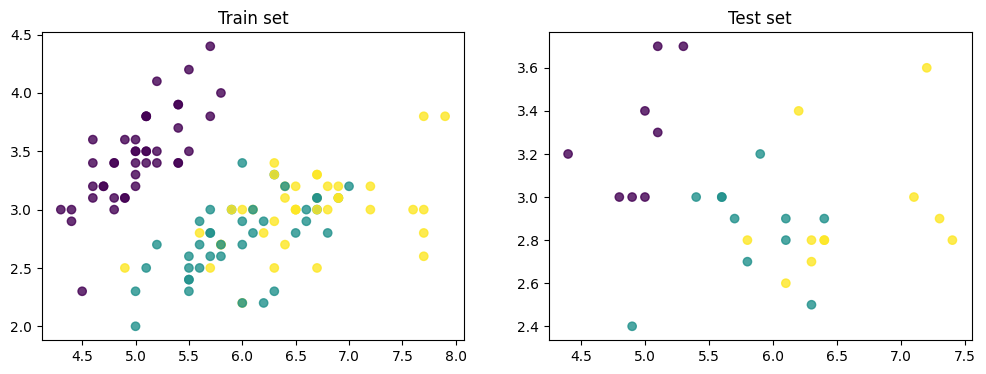

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

In [49]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
#Obtient le score sur les données d'entraînement XXXXNE PAS FAIRE
print("test sur les données d'entrainement", model.score(X_train, y_train))
#Test sur les données test
print(f"train score: {model.score(X_test, y_test)}")

test sur les données d'entrainement 1.0
train score: 0.9


### Validation set: améliorer le modèle

=> Régler les hyperparamètres

On utilise un validation set, sur lequel on va cherchere à obtenir les meilleurs hyperparamètres pour obtenir un score maximal.On le fait sur un validation set et non le test set pour ne pas corrompre les données et ne pas faire un overfitting
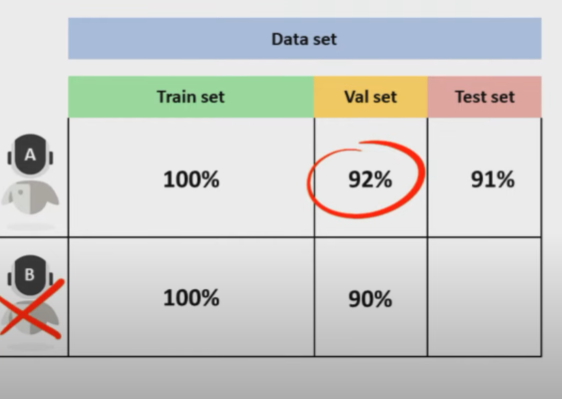

### Cross Validation

Entrainer et valider le modèle sur plusieurs découpes possible du dataset
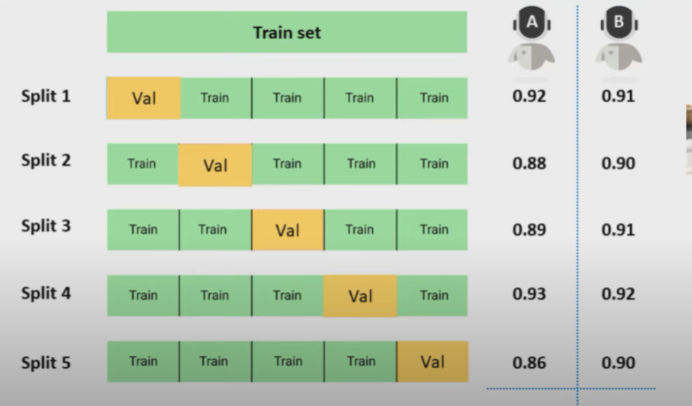

In [65]:
#function(cv=nombre de splits, socring=métrique du score)
#On obtient le score pour chaque split dans un tableau numpy
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy")
#Fais la moyenne des scores
cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=5, scoring="accuracy")

array([1.        , 1.        , 0.95833333, 0.95833333, 0.95833333])

###  Validation Curve

In [68]:
#RAPPEL
#Division du dataset: 80% de train set et 20% de test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#Division du train set: 80% de train set et 20% de validation set
#Retourne les données que sur le set de validation
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy")


array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

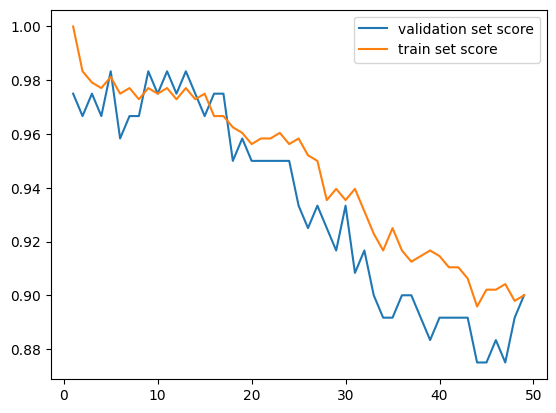

In [84]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
#On obtient le résultat des 49(chaque hyperparamètre testé)*5(cv=5 donc le train set est divisé en 5 et utilisé 5 fois) splits(chaque ligne étant les 5 scores de validation)
#On obtient 49 lignes de 5 splits
train_score, val_score = validation_curve(estimator=model, X=X_train, y=y_train, param_name="n_neighbors", param_range=k, cv=5, scoring="accuracy")

#Affiche la moyenne de chacun des 49 hyperparamètres
plt.plot(k, val_score.mean(axis=1), label="validation set score")
plt.plot(k, train_score.mean(axis=1), label="train set score")
plt.legend()


Exercise: retrouver le k maximisant le validation score

In [97]:
train_score, val_score = validation_curve(estimator=model, X=X_train, y=y_train, param_name="n_neighbors", param_range=k, cv=5, scoring="accuracy")
#Retrouve l'index(et donc le k) de la ligne du tableau val_score qui a le score le plus élevé
best_param = val_score.mean(axis=1).argsort()[0]

KNeighborsClassifier(n_neighbors=best_param).fit(X_train, y_train).score(X_test, y_test)

1.0

### GridSearchCV

Permet de trouver les meilleurs hyperparamètres grace au cross validation

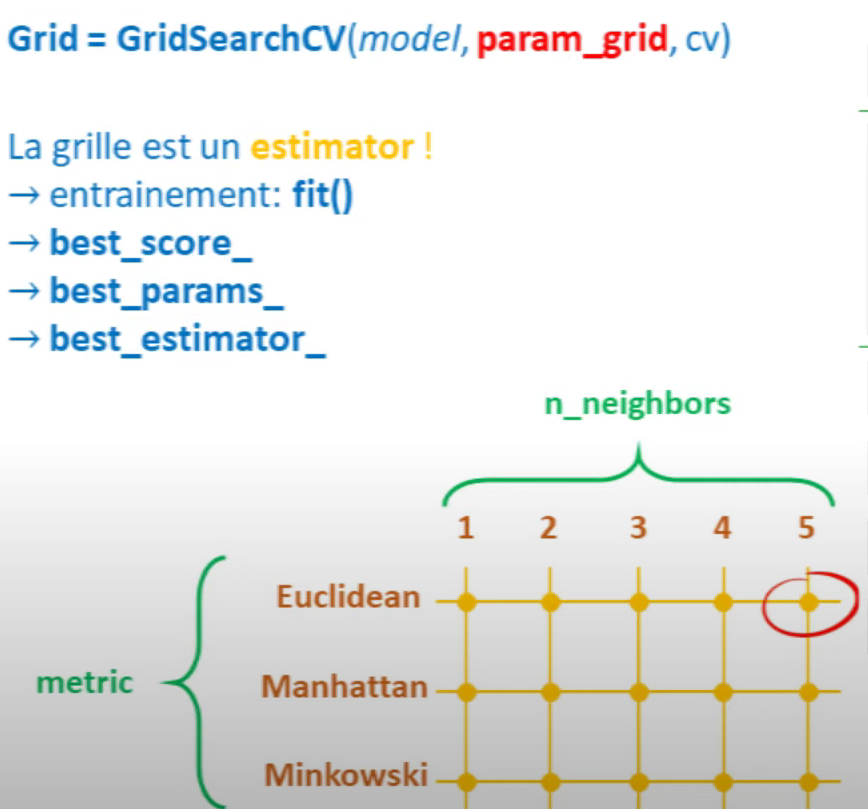

In [108]:
#Création des paramètres et de leurs variations
param_grid = {"n_neighbors": np.arange(1, 20), "metric": ["euclidean", "manhattan", "minkowski"]}
#Création de la grille(comme ci-dessus)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
#Entrainement de cette grille
grid.fit(X_train, y_train)
#Retourne le meilleur score
print("Best score:", grid.best_score_)
#Retourne les meilleurs hyperparamètres
print("Best parameters:", grid.best_params_)
#Sauvegarde le meilleur modèle
model = grid.best_estimator_
model.score(X_test, y_test)
#Crée une matrice de confusion évaluant les prédictions du modèle
#function(données réelles, données prédites à évaluer)
confusion_matrix(y_test, model.predict(X_test))

Best score: 0.9833333333333334
Best parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(5)}


array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

### Learning Curve

Permet de savoir si le modèle à plafonner dans sa performance

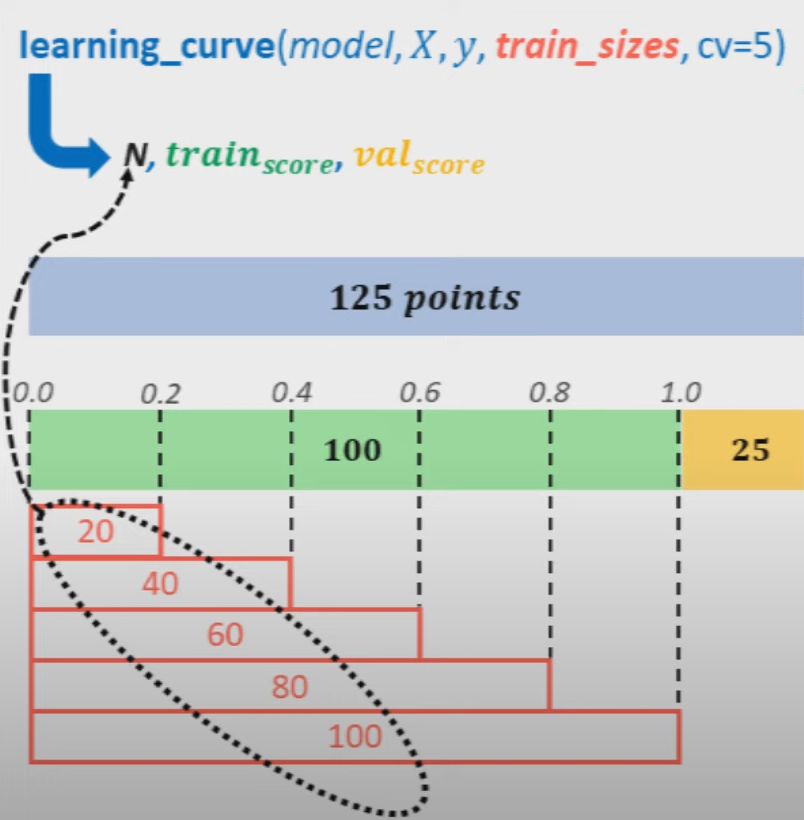

In [115]:
#Stocke dans N le tab des tailles d'échantillons, train_score le score d'entraînement(par rapport à la taille d'échantillon) et val_score le score de validation 
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

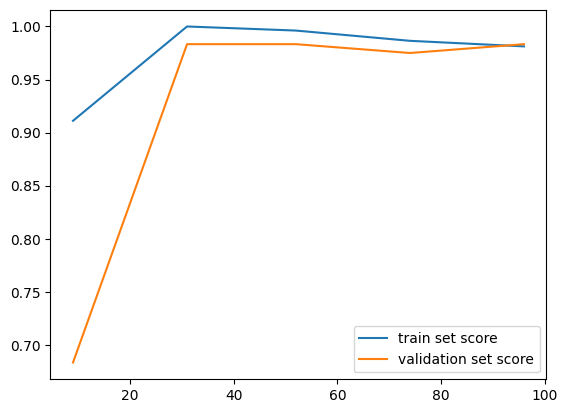

In [117]:
plt.plot(N, train_score.mean(axis=1), label="train set score")
plt.plot(N, val_score.mean(axis=1), label="validation set score")
plt.legend()